## ML model

In [763]:
# Regular EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import imblearn

**Data loading and preprocessing**

In [764]:
df = pd.read_csv('chronic_kidney_disease_use_copy.csv')
df = df.replace('?', np.nan) #remplacing the '?' in data with Null

# Changing from string to Numeric Value
numeric_cols = ["age", "bp", "sg", "al", "su", "bgr", "bu", "sc", "sod", "pot", "hemo", "pcv", "wbcc", "rbcc"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [765]:
print(df.shape)

(400, 25)


In [766]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [767]:
df['class'].value_counts()

class
ckd       250
notckd    150
Name: count, dtype: int64

In [768]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

## Analysis of data

**Analysing different features**

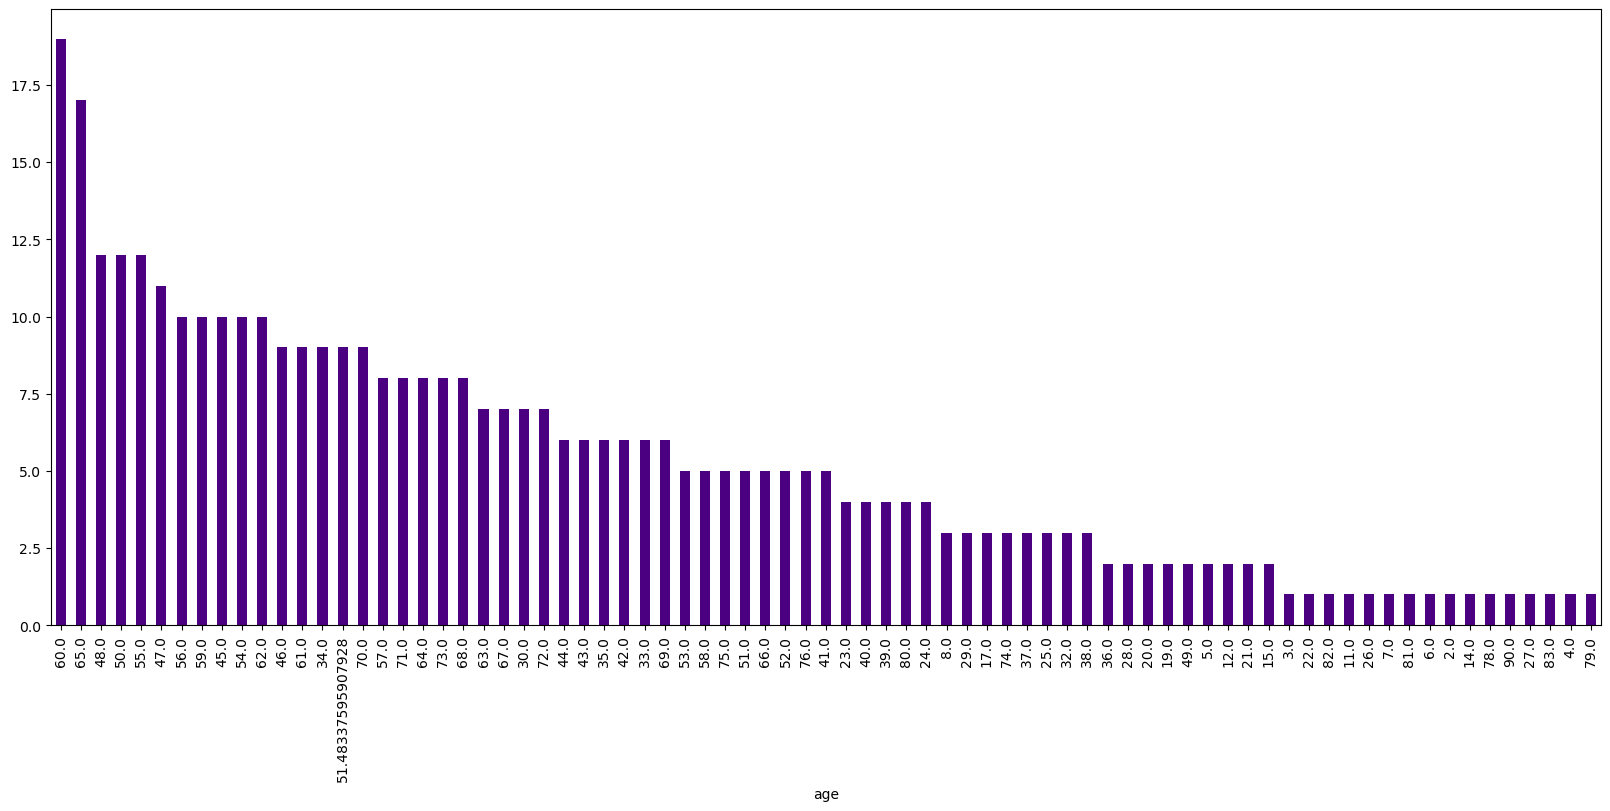

In [769]:
# plot of age vs frequency
df['age']= df['age'].fillna(value=df['age'].mean())
df['age'].value_counts().plot.bar(figsize=(20,8), color='indigo')
plt.show()

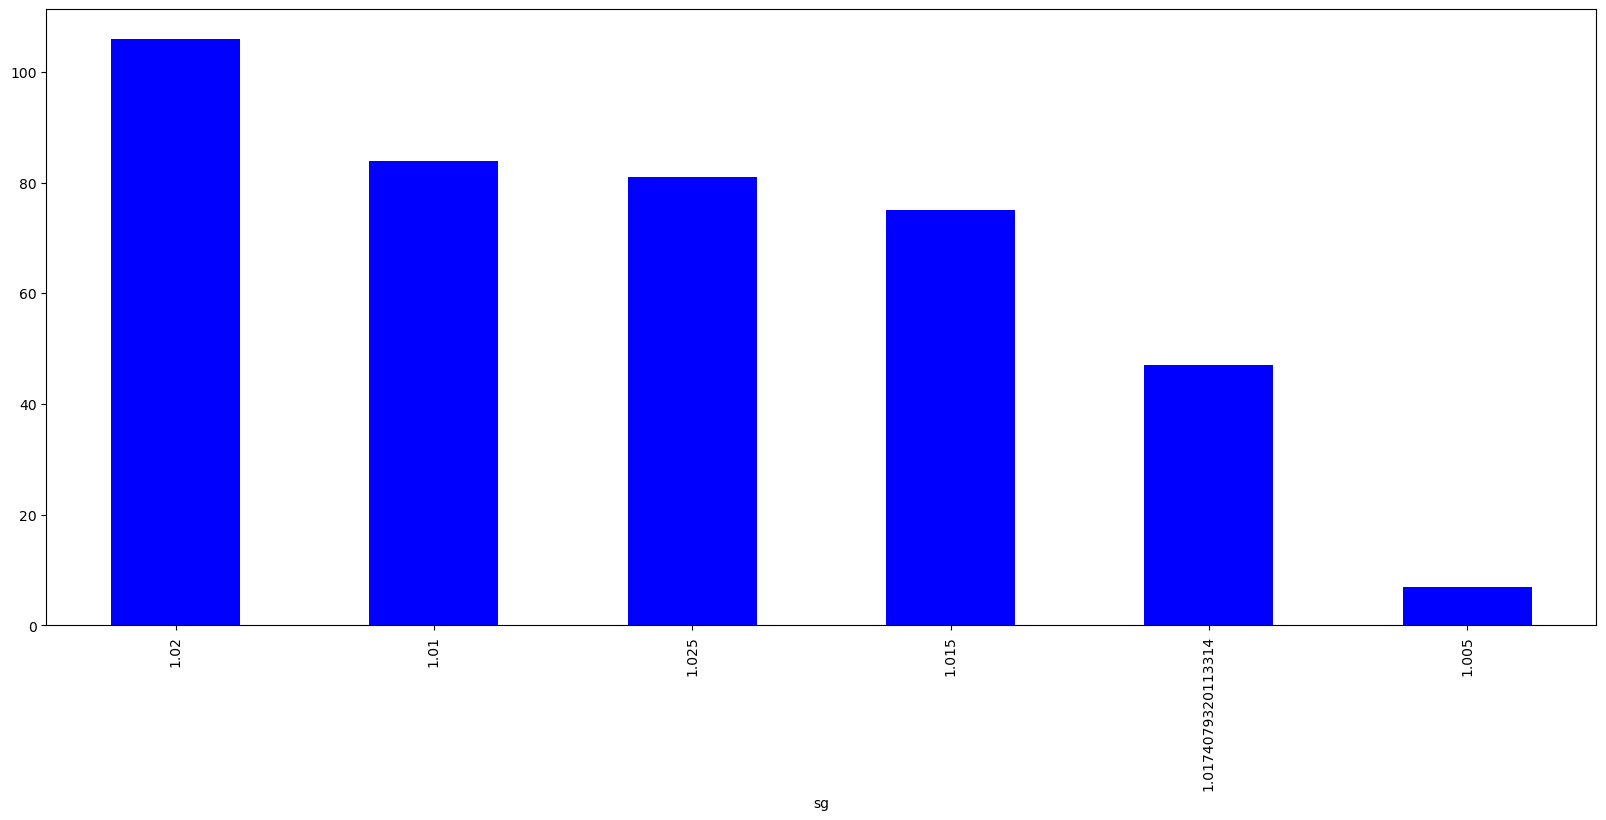

In [770]:
# plot for specific gravity 
df['sg']= df['sg'].fillna(value=df['sg'].mean())
df['sg'].value_counts().plot.bar(figsize=(20,8), color='Blue')
plt.title=('analysing specific gravity feature')
plt.xlabel=('Specific gravity')
plt.ylabel=('frequency')
plt.show()

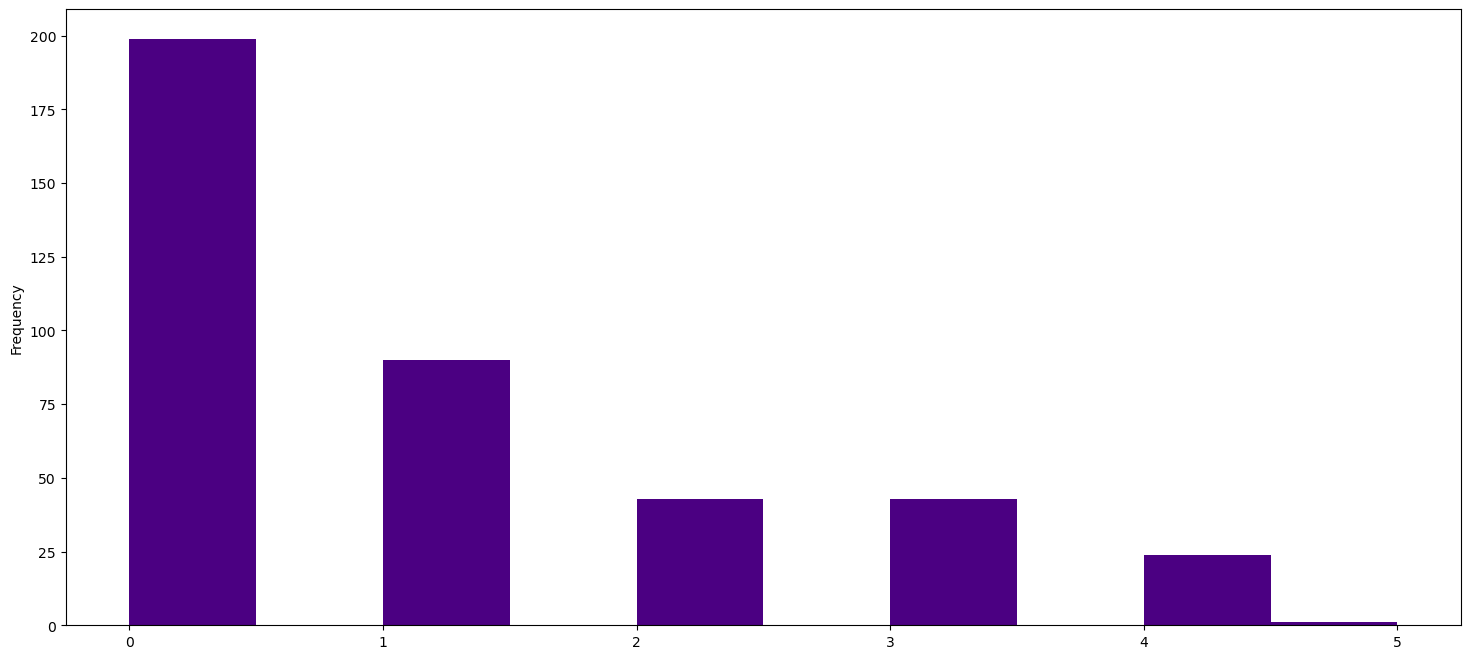

In [771]:
df['al']= df['al'].fillna(value=df['al'].mean())
df['al'].plot.hist(figsize=(18,8), color='indigo')
plt.title=('analysing albumin')
plt.xlabel=('albumin')
plt.show()

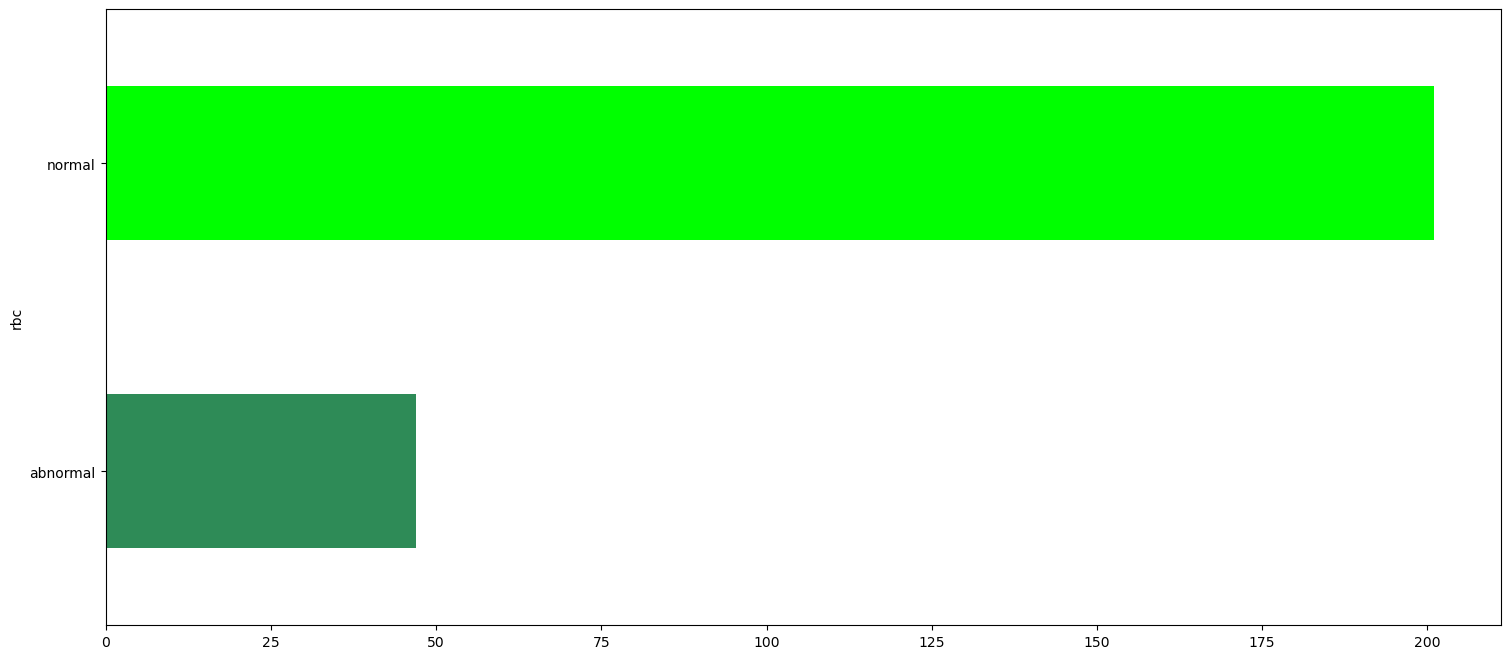

In [772]:
df['rbc'].value_counts(ascending=True).plot.barh(figsize=(18,8), color=['seagreen', 'lime'])
plt.title=('Analysing red blood cells')
plt.xlabel=('frequency of samples')
plt.ylabel=("unique labels")
plt.show()

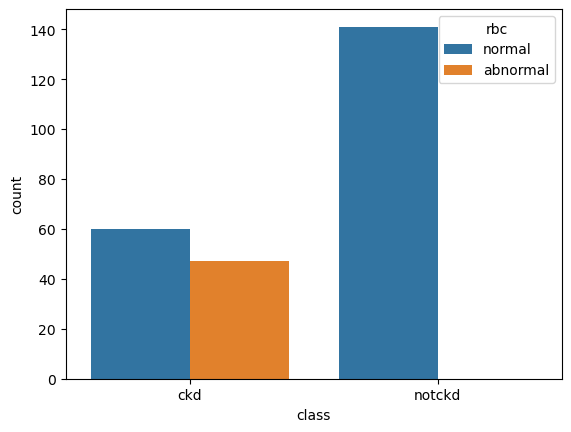

In [773]:
# plot between red blood cells and target class
sns.countplot(x=df['class'], hue=df['rbc'], data=df)
plt.show()

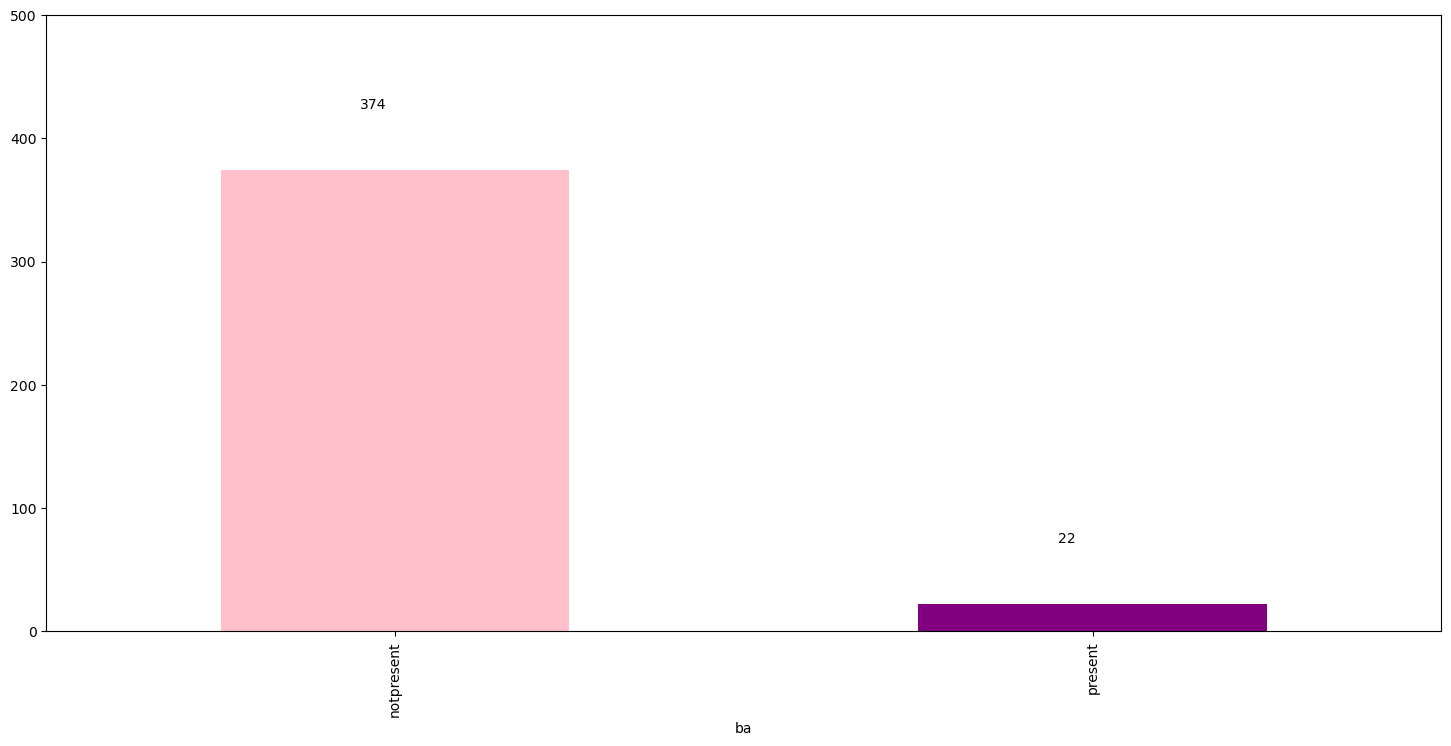

In [774]:
ax=df['ba'].value_counts().plot.bar(figsize=(18,8), color=['pink','purple'])
for dot in ax.patches:
    ax.annotate((dot.get_height()),(dot.get_x()+0.20,dot.get_height()+50))
plt.ylim(0, 500)
plt.title=("Unique record comparision for bacteria feature")
plt.show()

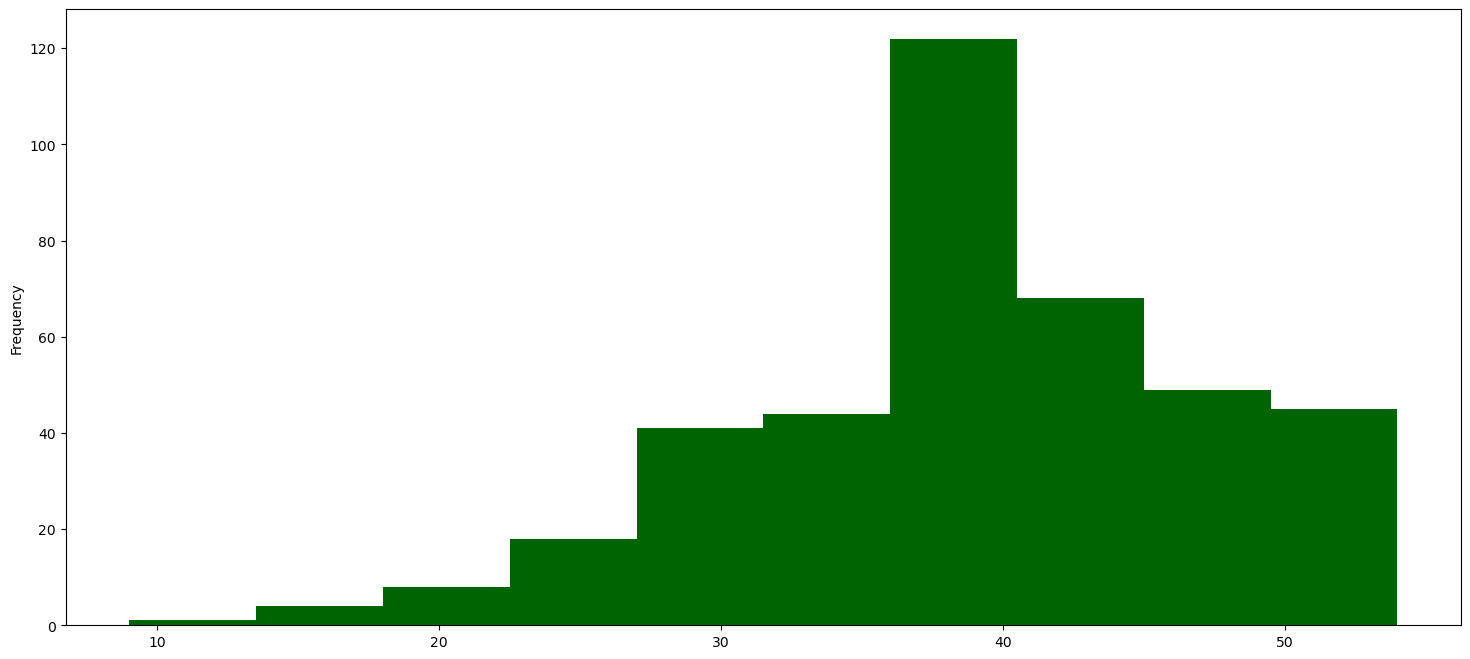

In [775]:
df['pcv']= df['pcv'].fillna(value=df['pcv'].mean())
df['pcv'].plot.hist(figsize=(18,8), color='darkgreen')
plt.title=('analysing packed cell volume')
plt.xlabel=('volume')
plt.show()

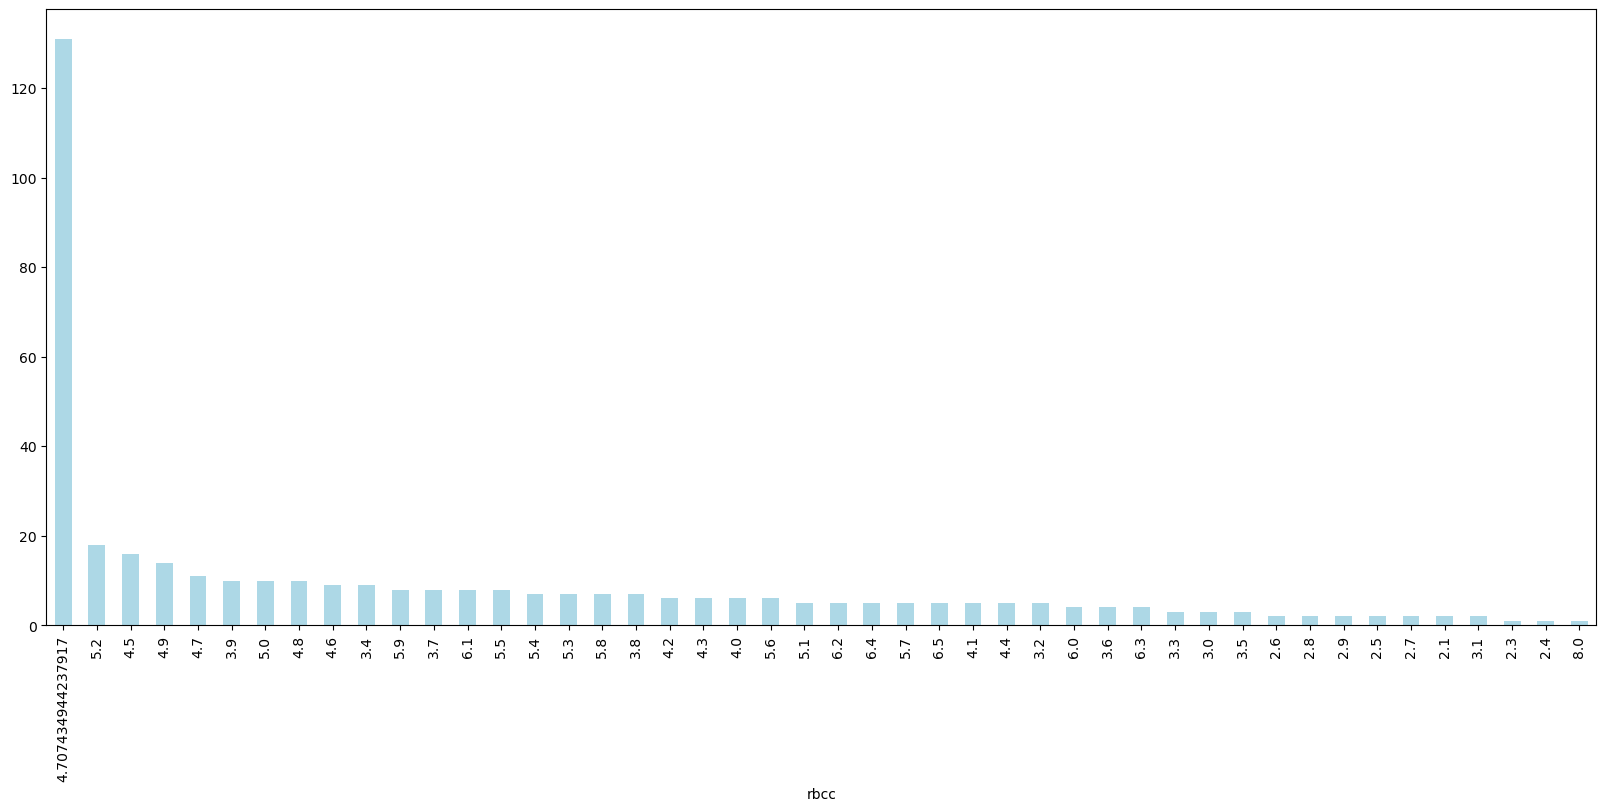

In [776]:
df['rbcc']= df['rbcc'].fillna(value=df['rbcc'].mean())
df['rbcc'].value_counts().plot.bar(figsize=(20,8), color='lightblue')
plt.title=('analysing red blood cell counts')
plt.xlabel=('blood cell count')
plt.ylabel=('frequency')


<Axes: ylabel='Frequency'>

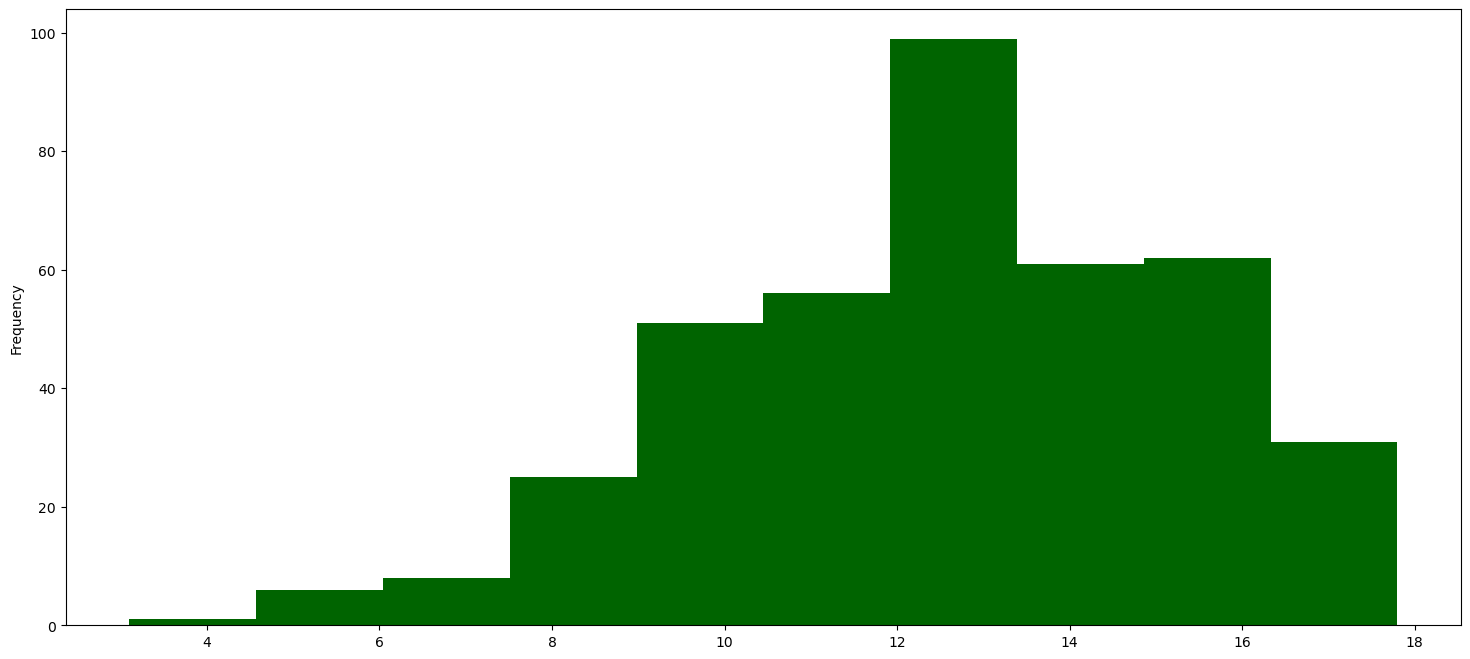

In [777]:
# plot between coronary_artery_disease and target class
df['hemo']= df['hemo'].fillna(value=df['hemo'].mean())
df['hemo'].plot.hist(figsize=(18,8), color='darkgreen')

## Preparing DATA

**Nullvalue analysis**

In [778]:
# Filling in Null value in 'Object' datatype
str_col=[features for features in df.columns if df[features].dtype=='O']
for col in str_col:
    df[col]= df[col].fillna(df[col].mode().values.tolist()[0])

# Filling in Null value in Numeric datatype
num_col=[features for features in df.columns if df[features].dtype!='O']
for feature in num_col:
    df[feature]= df[feature].fillna(df[feature].mean())
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [779]:
df.isna().sum() # Checking for any missing data

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [780]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    float64
 5   rbc     400 non-null    object 
 6   pc      400 non-null    object 
 7   pcc     400 non-null    object 
 8   ba      400 non-null    object 
 9   bgr     400 non-null    float64
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    float64
 16  wbcc    400 non-null    float64
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    object 
 19  dm      400 non-null    object 
 20  cad     400 non-null    object 
 21  appet   400 non-null    object 
 22  pe

In [781]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,16.974966,13.476298,0.005369,1.272318,1.029487,74.782634,49.285887,5.617490,9.204273,2.819783,2.716171,8.151081,2523.219976,0.840314
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.875000,34.000000,6975.000000,4.500000
50%,54.000000,78.234536,1.017408,1.000000,0.000000,126.000000,44.000000,1.400000,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
75%,64.000000,80.000000,1.020000,2.000000,0.450142,150.000000,61.750000,3.072454,141.000000,4.800000,14.625000,44.000000,9400.000000,5.100000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [782]:
df.to_csv('prepared_data.csv', index=False) #exproting preprocessed data

**Label encoding**

In [783]:
df['dm'] = df['dm'].map({'yes': 1, 'no': 0})
df['cad'] = df['cad'].map({'yes': 1, 'no': 0})
df['rbc'] = df['rbc'].map({'normal': 1, 'abnormal': 0})
df['pc'] = df['pc'].map({'normal': 1, 'abnormal': 0})
df['pcc'] = df['pcc'].map({'present': 1, 'notpresent': 0})
df['ba'] = df['ba'].map({'present': 1, 'notpresent': 0})
df['htn'] = df['htn'].map({'yes': 1, 'no': 0})
df['pe'] = df['pe'].map({'yes': 1, 'no': 0})
df['ane'] = df['ane'].map({'yes': 1, 'no': 0})
df['appet'] = df['appet'].map({'good': 0, 'poor': 1})
df['class'] = df['class'].map({'ckd': 0, 'notckd': 1})

In [784]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,0,0,0,0


In [785]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    float64
 5   rbc     400 non-null    int64  
 6   pc      400 non-null    int64  
 7   pcc     400 non-null    int64  
 8   ba      400 non-null    int64  
 9   bgr     400 non-null    float64
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    float64
 16  wbcc    400 non-null    float64
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    int64  
 19  dm      400 non-null    int64  
 20  cad     400 non-null    int64  
 21  appet   400 non-null    int64  
 22  pe

<Axes: >

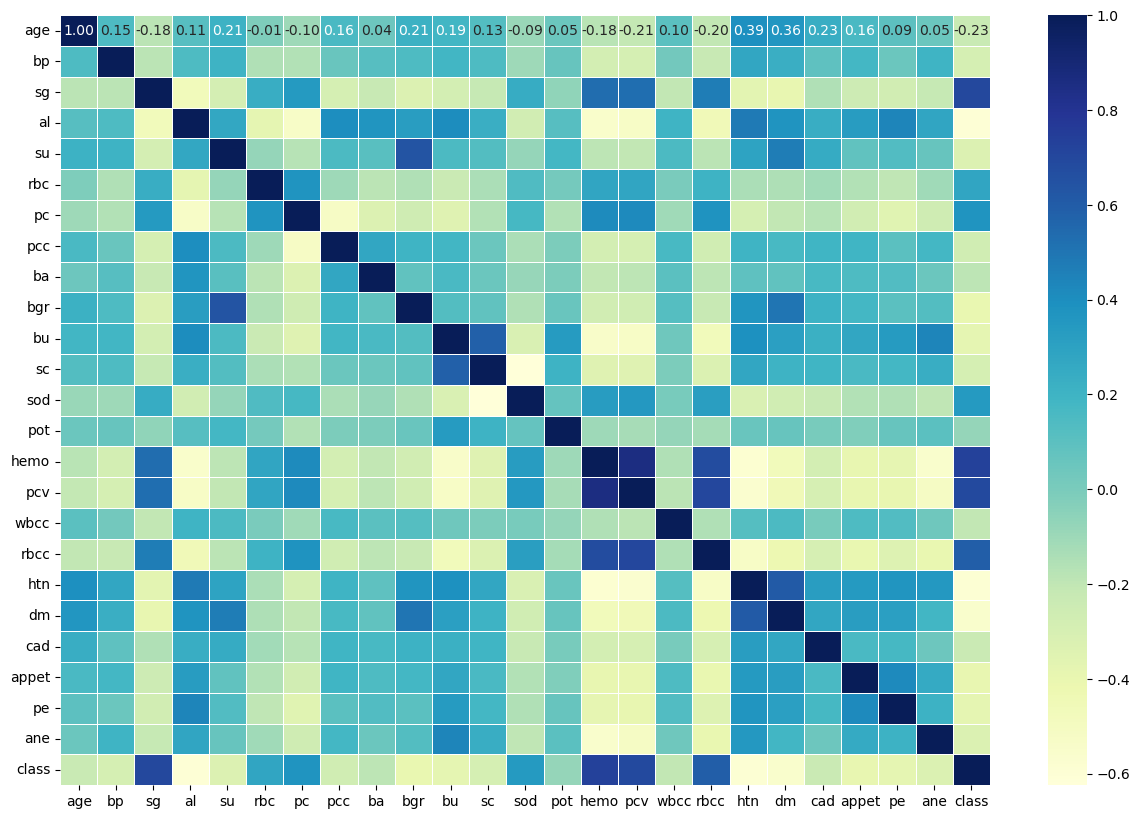

In [786]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

We see that pcv and hemo has approx 85% multicollinearity.
So we will remove pcv as a feature

## Feature Importance

In [787]:
ind_feature= df.iloc[:, :-1]
dep_feature= df.iloc[:, -1]

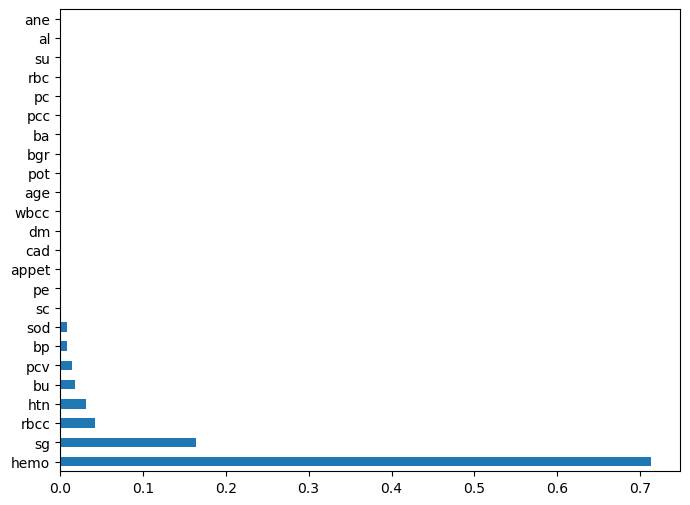

In [788]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model.fit(ind_feature, dep_feature)

plt.figure(figsize=(8,6))
rank_feature= pd.Series(model.feature_importances_, index= ind_feature.columns)
rank_feature.nlargest(24).plot(kind='barh')
plt.show()

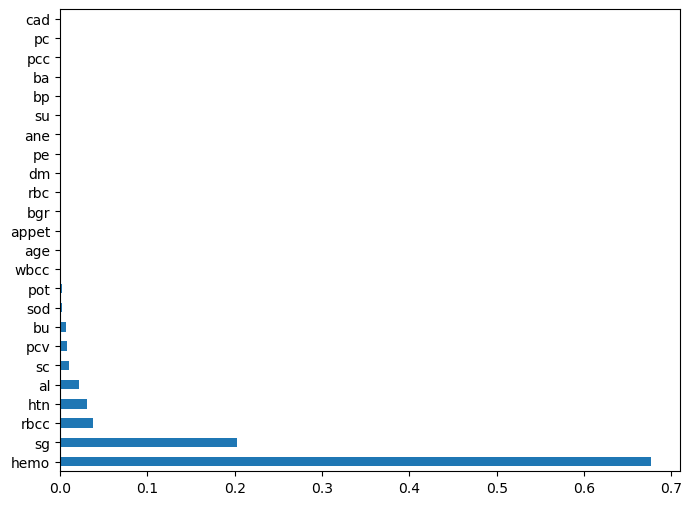

In [789]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model.fit(ind_feature, dep_feature)

plt.figure(figsize=(8,6))
rank_feature= pd.Series(model.feature_importances_, index= ind_feature.columns)
rank_feature.nlargest(24).plot(kind='barh')
plt.show()

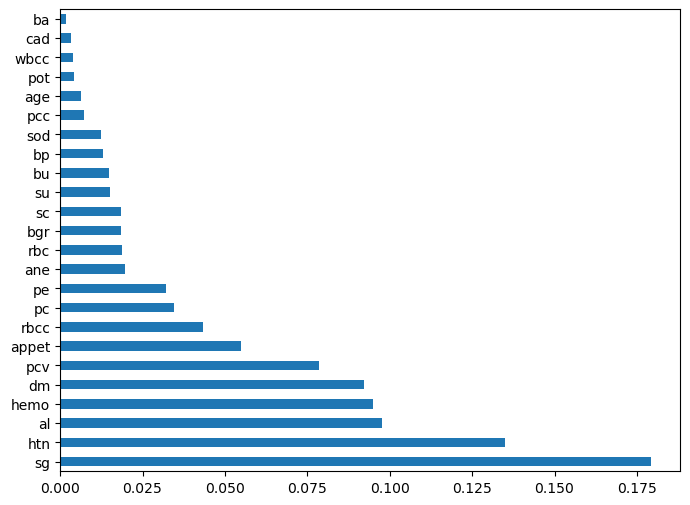

In [790]:
from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier()
model.fit(ind_feature, dep_feature)

plt.figure(figsize=(8,6))
rank_feature= pd.Series(model.feature_importances_, index= ind_feature.columns)
rank_feature.nlargest(24).plot(kind='barh')
plt.show()

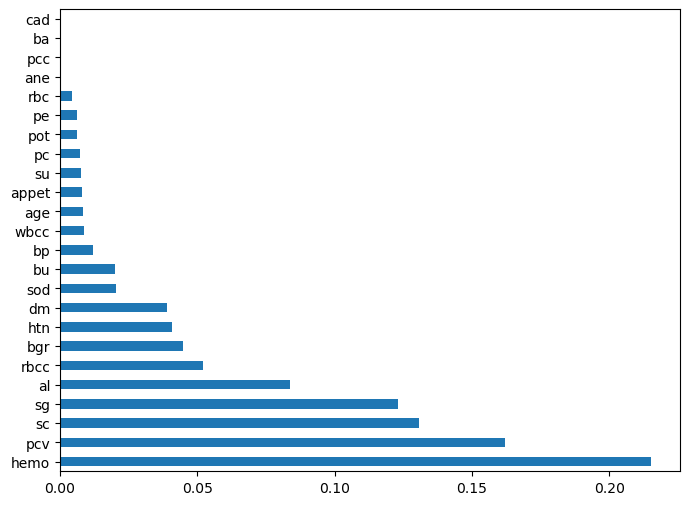

In [791]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(ind_feature, dep_feature)

plt.figure(figsize=(8,6))
rank_feature= pd.Series(model.feature_importances_, index= ind_feature.columns)
rank_feature.nlargest(24).plot(kind='barh')
plt.show()

## Feature selection and oversampling

*After observing the feature importance of some models we will use. We will take the common top 16 features into consideration*

In [792]:
df= df[['age', 'bp', 'sg', 'al', 'su', 'rbc',
        'pc','bgr', 'bu', 'sc', 'hemo',
        'rbcc', 'htn', 'dm', 'appet', 'pe', 'class']]
df.shape

(400, 17)

In [793]:
df.head()

,age,bp,sg,al,su,rbc,pc,bgr,bu,sc,hemo,rbcc,htn,dm,appet,pe,class
0,48.0,80.0,1.020,1.0,0.0,1,1,121.000000,36.0,1.2,15.4,5.200000,1,1,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,148.036517,18.0,0.8,11.3,4.707435,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,423.000000,53.0,1.8,9.6,4.707435,0,1,1,0,0
3,48.0,70.0,1.005,4.0,0.0,1,0,117.000000,56.0,3.8,11.2,3.900000,1,0,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,106.000000,26.0,1.4,11.6,4.600000,0,0,0,0,0


In [794]:
df=df.sample(frac=1).reset_index(drop=True)
X = df.drop('class', axis=1)
y = df['class']

**Outlier detection using IQR**

In [795]:
def remove_outlier(df):
    q1= df.quantile(0.25)
    q3= df.quantile(0.75)
    IQR= q3-q1
    df_final=df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return df_final

In [796]:
df_=remove_outlier(df)

In [797]:
X=df.drop('class', axis=1)
y=df['class']
X=X.astype('float32')
X.head()

,age,bp,sg,al,su,rbc,pc,bgr,bu,sc,hemo,rbcc,htn,dm,appet,pe
0,34.0,90.0,1.015,2.0,0.0,1.0,1.0,104.0,50.0,1.6,11.900000,4.707435,0.0,0.0,0.0,0.0
1,42.0,70.0,1.025,0.0,0.0,1.0,1.0,75.0,31.0,1.2,16.500000,6.200000,0.0,0.0,0.0,0.0
2,65.0,60.0,1.010,2.0,0.0,1.0,0.0,192.0,17.0,1.7,12.526437,4.707435,1.0,1.0,1.0,0.0
3,24.0,80.0,1.020,0.0,0.0,1.0,1.0,93.0,46.0,1.0,12.526437,6.300000,0.0,0.0,0.0,0.0
4,43.0,60.0,1.025,0.0,0.0,1.0,1.0,117.0,45.0,0.7,13.000000,5.400000,0.0,0.0,0.0,0.0


**data oversampling using smote**

In [798]:
from imblearn.over_sampling import SMOTE
X_smote, y_smote= SMOTE().fit_resample(X.values, y.values.ravel())

smote_df = pd.DataFrame(X_smote, columns=X.columns)
smote_df['class']=y_smote

smote_df['class'].value_counts()

class
0    250
1    250
Name: count, dtype: int64

In [799]:
from sklearn.utils import resample
resampled= []
for label in smote_df['class'].unique().tolist():
    resampled.append(resample(smote_df.loc[smote_df['class']==label], n_samples=400))
df= pd.concat(objs= resampled, ignore_index=True)
df= df.sample(frac=1).reset_index(drop=True)

df['class'].value_counts()

class
0    400
1    400
Name: count, dtype: int64

**data transformation**

In [800]:
X=df.drop('class', axis=1)
X.head()

,age,bp,sg,al,su,rbc,pc,bgr,bu,sc,hemo,rbcc,htn,dm,appet,pe
0,51.483376,70.0,1.017408,1.016949,0.450142,1.0,1.0,93.000000,155.0,7.300000,12.526437,4.707435,1.0,1.0,0.0,0.0
1,34.000000,70.0,1.015000,4.000000,0.000000,0.0,0.0,153.000000,22.0,0.900000,12.526437,4.707435,0.0,0.0,0.0,1.0
2,47.078430,60.0,1.021299,0.000000,0.000000,1.0,1.0,114.519608,26.0,0.777941,15.207843,5.644118,0.0,0.0,0.0,0.0
3,72.000000,80.0,1.017408,1.016949,0.450142,1.0,1.0,137.000000,65.0,3.400000,9.700000,2.500000,1.0,1.0,1.0,0.0
4,53.000000,60.0,1.025000,0.000000,0.000000,1.0,1.0,116.000000,26.0,1.000000,15.800000,5.200000,0.0,0.0,0.0,0.0


In [801]:
from sklearn.preprocessing import StandardScaler
standard_scaler= StandardScaler()
standard_scaler.fit(X.values)

New_X= standard_scaler.transform(X.values)
New_df= pd.DataFrame(New_X, columns=X.columns)
New_df['class']= df['class'].values.ravel()
New_df.head()

,age,bp,sg,al,su,rbc,pc,bgr,bu,sc,hemo,rbcc,htn,dm,appet,pe,class
0,0.013323,-0.482460,-0.212023,0.137849,0.072777,0.321634,0.438464,-0.668245,2.109275,1.208101,-0.180706,-0.132006,1.470393,1.644294,-0.482354,-0.436436,0
1,-1.067609,-0.482460,-0.674869,2.609092,-0.395742,-3.109126,-2.280691,0.136677,-0.690140,-0.417436,-0.180706,-0.132006,-0.680090,-0.608164,-0.482354,2.291288,0
2,-0.259019,-1.272501,0.535924,-0.704620,-0.395742,0.321634,0.438464,-0.379552,-0.605947,-0.448438,0.803109,1.009100,-0.680090,-0.608164,-0.482354,-0.436436,1
3,1.281789,0.307580,-0.212023,0.137849,0.072777,0.321634,0.438464,-0.077969,0.214934,0.217539,-1.217733,-2.821196,1.470393,1.644294,2.073165,-0.436436,0
4,0.107090,-1.272501,1.247322,-0.704620,-0.395742,0.321634,0.438464,-0.359692,-0.605947,-0.392037,1.020373,0.468057,-0.680090,-0.608164,-0.482354,-0.436436,1


**Preparing train and test data for model**

In [802]:
X= New_df.drop('class', axis=1)
y=New_df['class']

In [803]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(640, 16) (160, 16) (640,) (160,)


In [804]:
# Exporting training and test set
X_train.to_csv('training_set_feature.csv', index=False)
y_train.to_csv('training_set_target.csv', index=False)
X_test.to_csv('testing_set_feature.csv', index=False)
y_test.to_csv('testing_set_target.csv', index=False)

**Importing Models**

In [805]:
# Importing Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier

In [806]:
# Importing training and test set 
X_train= pd.read_csv('training_set_feature.csv')
y_train= pd.read_csv('training_set_target.csv')
X_test= pd.read_csv('testing_set_feature.csv')
y_test= pd.read_csv('testing_set_target.csv')

y_train= y_train.values.ravel()
y_test= y_test.values.ravel()

**Since the algorithms we've chosen implement the same methods for fitting them to the data as well as evaluating them, let's put them in a dictionary and create function a which fits and scores them.**

In [807]:
# taking all the models we will be using
models = {"Decision Tree": DecisionTreeClassifier(),
          "Gradient boost": GradientBoostingClassifier(), 
          "Random Forest": RandomForestClassifier(),
          "Naive bayes": GaussianNB(),
          "KNN classifier": KNeighborsClassifier(),
          "SVC": SVC(probability=True),
          "Extra tree": ExtraTreesClassifier(),
          "adaboost": AdaBoostClassifier()}
# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [808]:
# printing score of each model
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

C:\Users\kushu\Desktop\intern_pro1\env_intern\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'Decision Tree': 0.99375,
 'Gradient boost': 0.99375,
 'Random Forest': 1.0,
 'Naive bayes': 0.95625,
 'KNN classifier': 0.98125,
 'SVC': 0.99375,
 'Extra tree': 0.99375,
 'adaboost': 1.0}

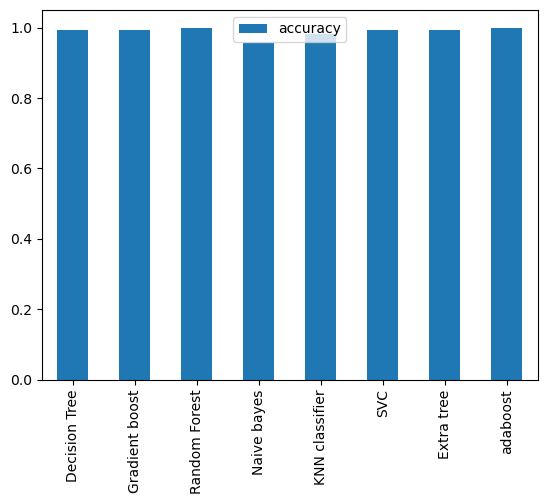

In [809]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar(); # graphical representation of each model's score

**It looks like AdaboostClassifier and ExtraTreeClassifier models are overfitting**

**We will continue to train our data on these models: Random Forest, Decision Tree, GBoost, Naive Bayes, KNN classifier**

## ML pipeline

In [810]:
# Importing libraries
import pandas as pd
import numpy as np

In [811]:
# 
df = pd.read_csv('chronic_kidney_disease_use_copy.csv')
df = df.replace('?', np.nan) #remplacing the '?' in data with Null

# Changing from string to Numeric Value
numeric_cols = ["age", "bp", "sg", "al", "su", "bgr", "bu", "sc", "sod", "pot", "hemo", "pcv", "wbcc", "rbcc"]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [812]:
# Handling missing data by filling in Null value 

# 'object' datatype
str_col=[features for features in df.columns if df[features].dtype=='O']
for col in str_col:
    df[col]= df[col].fillna(df[col].mode().values.tolist()[0])

# Numeric datatype
num_col=[features for features in df.columns if df[features].dtype!='O']
for feature in num_col:
    df[feature]= df[feature].fillna(df[feature].mean())

In [813]:
# Label Encoding / Mapping type "object" value into nuremic values for easy understanding by model
df['dm'] = df['dm'].map({'yes': 1, 'no': 0})
df['cad'] = df['cad'].map({'yes': 1, 'no': 0})
df['rbc'] = df['rbc'].map({'normal': 1, 'abnormal': 0})
df['pc'] = df['pc'].map({'normal': 1, 'abnormal': 0})
df['pcc'] = df['pcc'].map({'present': 1, 'notpresent': 0})
df['ba'] = df['ba'].map({'present': 1, 'notpresent': 0})
df['htn'] = df['htn'].map({'yes': 1, 'no': 0})
df['pe'] = df['pe'].map({'yes': 1, 'no': 0})
df['ane'] = df['ane'].map({'yes': 1, 'no': 0})
df['appet'] = df['appet'].map({'good': 0, 'poor': 1})

# here ckd is assigned as 0 and notckd is assigned as 1
df['class'] = df['class'].map({'ckd': 0, 'notckd': 1})

In [814]:
# Featuring
df= df[['age', 'bp', 'sg', 'al', 'su', 'rbc',
        'pc','bgr', 'bu', 'sc', 'hemo',
        'rbcc', 'htn', 'dm', 'appet', 'pe', 'class']]

df=df.sample(frac=1).reset_index(drop=True)
X = df.drop('class', axis=1)
y = df['class']

In [815]:
#  using IQR for outlier detection
def remove_outlier(df):
    q1= df.quantile(0.25)
    q3= df.quantile(0.75)
    IQR= q3-q1
    df_final=df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return df_final

df_= remove_outlier(df)

X=df.drop('class', axis=1)
y=df['class']
X=X.astype('float32')
X.head()

,age,bp,sg,al,su,rbc,pc,bgr,bu,sc,hemo,rbcc,htn,dm,appet,pe
0,63.0,90.0,1.015000,0.000000,0.000000,1.0,1.0,123.0,19.0,2.0,11.700000,4.700000,0.0,0.0,0.0,0.0
1,46.0,90.0,1.010000,2.000000,0.000000,1.0,0.0,99.0,80.0,2.1,11.100000,4.100000,1.0,0.0,0.0,0.0
2,73.0,90.0,1.015000,3.000000,0.000000,1.0,0.0,107.0,33.0,1.5,10.100000,4.000000,0.0,0.0,1.0,0.0
3,71.0,90.0,1.015000,2.000000,0.000000,1.0,0.0,88.0,80.0,4.4,11.300000,3.900000,0.0,0.0,0.0,0.0
4,56.0,80.0,1.017408,1.016949,0.450142,1.0,1.0,415.0,37.0,1.9,12.526437,4.707435,0.0,1.0,0.0,0.0


In [816]:
# Oversampling using SMOTE
from imblearn.over_sampling import SMOTE
X_smote, y_smote= SMOTE().fit_resample(X.values, y.values.ravel())

smote_df = pd.DataFrame(X_smote, columns=X.columns)
smote_df['class']=y_smote

smote_df['class'].value_counts()

class
0    250
1    250
Name: count, dtype: int64

In [817]:
X=df.drop('class', axis=1)
X.head()

,age,bp,sg,al,su,rbc,pc,bgr,bu,sc,hemo,rbcc,htn,dm,appet,pe
0,63.0,90.0,1.015000,0.000000,0.000000,1,1,123.0,19.0,2.0,11.700000,4.700000,0,0,0,0
1,46.0,90.0,1.010000,2.000000,0.000000,1,0,99.0,80.0,2.1,11.100000,4.100000,1,0,0,0
2,73.0,90.0,1.015000,3.000000,0.000000,1,0,107.0,33.0,1.5,10.100000,4.000000,0,0,1,0
3,71.0,90.0,1.015000,2.000000,0.000000,1,0,88.0,80.0,4.4,11.300000,3.900000,0,0,0,0
4,56.0,80.0,1.017408,1.016949,0.450142,1,1,415.0,37.0,1.9,12.526437,4.707435,0,1,0,0


In [818]:
# Scaling 
from sklearn.preprocessing import StandardScaler
standard_scaler= StandardScaler()
standard_scaler.fit(X.values)

New_X= standard_scaler.transform(X.values)
New_df= pd.DataFrame(New_X, columns=X.columns)
New_df['class']= df['class'].values.ravel()
New_df.head()

,age,bp,sg,al,su,rbc,pc,bgr,bu,sc,hemo,rbcc,htn,dm,appet,pe,class
0,0.679297,1.005311,-0.449018,-0.800290,-0.437797,0.36489,0.484322,-0.335210,-0.780626,-0.191153,-0.304646,-8.858894e-03,-0.762252,-0.721743,-0.507801,-0.484322,0
1,-0.323432,1.005311,-1.381391,0.773613,-0.437797,0.36489,-2.064742,-0.656542,0.458601,-0.173329,-0.525822,-7.237716e-01,1.311903,-0.721743,-0.507801,-0.484322,0
2,1.269138,1.005311,-0.449018,1.560565,-0.437797,0.36489,-2.064742,-0.549431,-0.496213,-0.280272,-0.894449,-8.429238e-01,-0.762252,-0.721743,1.969276,-0.484322,0
3,1.151170,1.005311,-0.449018,0.773613,-0.437797,0.36489,-2.064742,-0.803819,0.458601,0.236620,-0.452097,-9.620759e-01,-0.762252,-0.721743,-0.507801,-0.484322,0
4,0.266409,0.262338,0.000000,0.000000,0.000000,0.36489,0.484322,3.574330,-0.414952,-0.208976,0.000000,-1.058283e-15,-0.762252,1.385535,-0.507801,-0.484322,0


In [819]:
# Importing necessary models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Importing different metrics
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

In [820]:
X= New_df.drop('class', axis=1)
y=New_df['class']

In [821]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(320, 16) (80, 16) (320,) (80,)


In [822]:
# Creating pipeline
dt_pipeline = Pipeline([('classifier', DecisionTreeClassifier(random_state=42))])

rf_pipeline = Pipeline([('classifier', RandomForestClassifier(random_state=42))])

nb_pipeline = Pipeline([('classifier', GaussianNB())])

gb_pipeline = Pipeline([('classifier', GradientBoostingClassifier(random_state=42))])


classifiers = {
    'Decision Tree': dt_pipeline,
    'Random Forest': rf_pipeline,
    'Naive Bayes': nb_pipeline,
    'Gradient Boosting': gb_pipeline
}

# Hyperparameter tuning with GridSearchCV for each classifier
param_grids = {
    'Decision Tree': {
        'classifier__max_depth': [5, 10, 15],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 5, 10]
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [5, 10, 15],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 5]
    },
    'Gradient Boosting': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 5]
    }
}

Training Decision Tree...
Best parameters for Decision Tree: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5}

Accuracy: 0.975
ROC AUC Score: 0.96875
F1 Score: 0.967741935483871
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.94      0.97        32

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80

Confusion Matrix:
[[48  0]
 [ 2 30]]


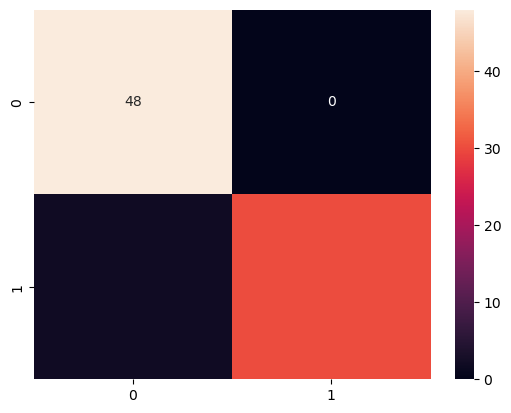

Training Random Forest...
Best parameters for Random Forest: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}

Accuracy: 0.975
ROC AUC Score: 1.0
F1 Score: 0.967741935483871
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.94      0.97        32

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80

Confusion Matrix:
[[48  0]
 [ 2 30]]


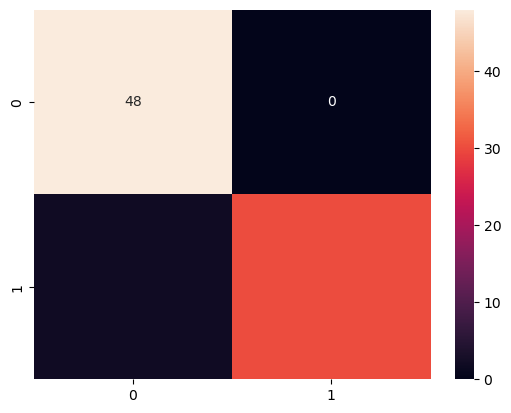

Training Naive Bayes...
Best parameters for Naive Bayes: {}

Accuracy: 0.95
ROC AUC Score: 0.9583333333333334
F1 Score: 0.9411764705882353
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        48
           1       0.89      1.00      0.94        32

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80

Confusion Matrix:
[[44  4]
 [ 0 32]]


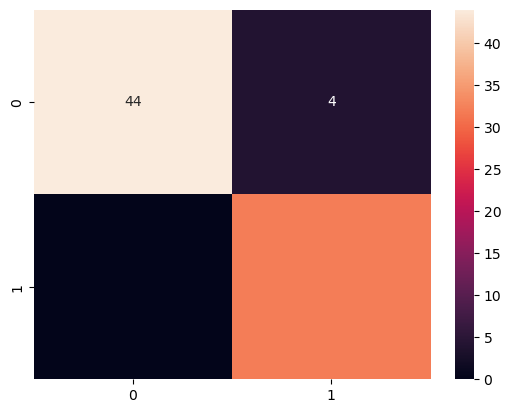

Training Gradient Boosting...
Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 50}

Accuracy: 0.975
ROC AUC Score: 1.0
F1 Score: 0.967741935483871
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.94      0.97        32

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80

Confusion Matrix:
[[48  0]
 [ 2 30]]


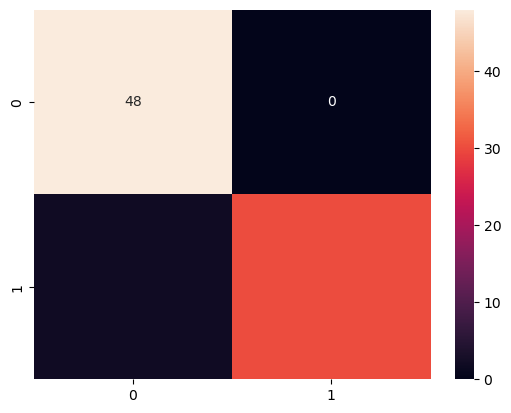

In [823]:
# Running all the models
for name, pipeline in classifiers.items():
    print(f"Training {name}...")
    param_grid = param_grids.get(name, {})  # Use get to avoid KeyError for classifiers without param_grid
    grid_search= GridSearchCV(pipeline, param_grid, cv= StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {name}: {grid_search.best_params_}")

    # Use the best model for predictions
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Printing the data and confusion matrix heatmap
    print(f'\nAccuracy: {accuracy}')
    print(f'ROC AUC Score: {roc_auc}')
    print(f'F1 Score: {f1}')
    print(f'Classification Report:\n{report}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
    plt.show()